In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Fake News Data.csv',encoding= 'unicode_escape')

Data Analysis

In [ ]:
df.head()

,News,Target
0,A man who stormed the U.S. Capitol in a horned...,0
1,âGeorgia and Kansas Capitol buildings have b...,0
2,We won. We won in a landslide. This was a land...,0
3,"Antifa"" is to blame for storming the U.S. Capi...",0
4,Google and Apple maps wonât give directions ...,0


In [ ]:
df.shape

(14670, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14670 entries, 0 to 14669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   News    14670 non-null  object
 1   Target  14670 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 229.3+ KB


In [ ]:
df.isnull().sum()             #no null values in dataset

News      0
Target    0
dtype: int64

In [ ]:
df.Target.value_counts()         #we have almost 12% of True News in the Dataset

0    13012
1     1658
Name: Target, dtype: int64

Train Test Split(to avoid data leakage)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.News,df.Target,test_size=0.2,random_state=0)

Data Cleaning

In [ ]:
news_list_train=X_train.values                                 #for training data

In [ ]:
type(news_list_train[0])

str

In [ ]:
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
bag_words_train=[]                                           
stemmer=PorterStemmer()
for i in range(len(news_list_train)):
    words=re.sub('[^a-zA-Z]',' ',news_list_train[i])
    words=words.lower().split()
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words=' '.join(words)
    bag_words_train.append(words)

In [ ]:
bag_words_train[0]

'twenti six men name william elect statewid offic seven women honor'

Word Embedding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vec=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
tf_transformer=tf_vec.fit(bag_words_train)
Embed_X_train=tf_vec.fit_transform(bag_words_train).toarray()

In [ ]:
Embed_X_train.shape

(11736, 5000)

In [ ]:
y_train.shape

(11736,)

In [ ]:
news_list_test=X_test.values                                 #for test data

In [ ]:
type(news_list_test[0])

str

In [ ]:
bag_words_test=[]                                           
stemmer=PorterStemmer()
for i in range(len(news_list_test)):
    words=re.sub('[^a-zA-Z]',' ',news_list_test[i])
    words=words.lower().split()
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words=' '.join(words)
    bag_words_test.append(words)

In [ ]:
bag_words_test[0]

'say percent texa counti abort provid'

In [ ]:
Embed_X_test=tf_vec.fit_transform(bag_words_test).toarray()

In [ ]:
Embed_X_test.shape

(2934, 5000)

In [ ]:
y_test.shape

(2934,)

In [ ]:
tf_vec.get_feature_names()[:10]

['abandon',
 'abbott',
 'abel',
 'abil',
 'abl',
 'abolish',
 'abolish ice',
 'abort',
 'abort illeg',
 'abort moment']

In [ ]:
tf_vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
Embed_X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

Model Training

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report

In [ ]:
classifier.fit(Embed_X_train,y_train)
pred=classifier.predict(Embed_X_test)

In [ ]:
def genererate_model_report(y_test,y_pred):
    print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
    print('')
    print('accuracy:',accuracy_score(y_test,y_pred))
    print('precision:',precision_score(y_test,y_pred))
    print('recall:',recall_score(y_test,y_pred))
    print('f1-score:',f1_score(y_test,y_pred))
    print('roc auc score:',roc_auc_score(y_test,y_pred))
    print('')
    print('classification report:\n',classification_report(y_test,y_pred))

In [ ]:
genererate_model_report(y_test,pred)

confusion matrix:
 [[2576   16]
 [ 340    2]]

accuracy: 0.8786639400136332
precision: 0.1111111111111111
recall: 0.005847953216374269
f1-score: 0.011111111111111112
roc auc score: 0.4998375568551007

classification report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.94      2592
           1       0.11      0.01      0.01       342

    accuracy                           0.88      2934
   macro avg       0.50      0.50      0.47      2934
weighted avg       0.79      0.88      0.83      2934



In [ ]:
print(Embed_X_train.shape)
print(y_train.shape)

(11736, 5000)
(11736,)


In [ ]:
print((y_train[y_train==0]).shape)               #the data is highly imbalanced so we need to balance them so that we do not get biased results
print((y_train[y_train==1]).shape)

(10420,)
(1316,)


In [ ]:
print((Embed_X_train[y_train==0]).shape)
print((Embed_X_train[y_train==1]).shape)

(10420, 5000)
(1316, 5000)


Data Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample=RandomOverSampler()
X_over,y_over=oversample.fit_resample(Embed_X_train,y_train)

In [ ]:
classifier.fit(X_over,y_over)
pred=classifier.predict(Embed_X_test)

In [ ]:
genererate_model_report(y_test,pred)

confusion matrix:
 [[2259  333]
 [ 305   37]]

accuracy: 0.7825494205862304
precision: 0.1
recall: 0.10818713450292397
f1-score: 0.10393258426966293
roc auc score: 0.48985745614035087

classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      2592
           1       0.10      0.11      0.10       342

    accuracy                           0.78      2934
   macro avg       0.49      0.49      0.49      2934
weighted avg       0.79      0.78      0.79      2934



In [ ]:
X_over.shape

(20840, 5000)

In [ ]:
from collections import Counter

In [ ]:
Counter(y_over)

Counter({0: 10420, 1: 10420})

In [ ]:
Counter(y_train)

Counter({0: 10420, 1: 1316})

In [ ]:
Counter(y_test)

Counter({0: 2592, 1: 342})

Hyper-Parameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'alpha':np.arange(0,1,0.1)}
score='accuracy'

grid_ob=GridSearchCV(classifier,parameters,score,cv=10)
grid_ob.fit(X_over,y_over)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_ob.best_params_

{'alpha': 0.0}

In [ ]:
grid_ob.best_score_

0.8471209213051824

In [ ]:
grid_pred=grid_ob.predict(Embed_X_test)

In [ ]:
genererate_model_report(y_test,grid_pred)

confusion matrix:
 [[2524   68]
 [ 333    9]]

accuracy: 0.8633265167007498
precision: 0.11688311688311688
recall: 0.02631578947368421
f1-score: 0.04295942720763722
roc auc score: 0.5000406107862249

classification report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2592
           1       0.12      0.03      0.04       342

    accuracy                           0.86      2934
   macro avg       0.50      0.50      0.48      2934
weighted avg       0.79      0.86      0.82      2934



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr1,tpr1,thresholds1=roc_curve(y_test,grid_pred)
fpr2,tpr2,thresholds2=roc_curve(y_test,pred)

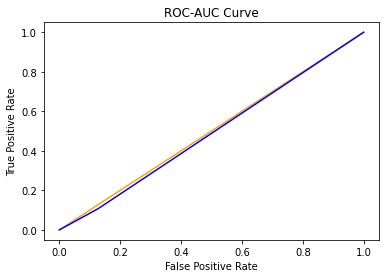

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr1,tpr1,color='orange',label='Optimized')
plt.plot(fpr2,tpr2,color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()
#orange line is slightly better as because of hyper parameter optimization

Saving the model

In [ ]:
import pickle

In [ ]:
with open('fake_news_predictor.pkl','wb') as fl:
    pickle.dump(grid_ob,fl)

In [ ]:
with open('fake_news_predictor.pkl','rb') as model:
  forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(Embed_X_test)

In [ ]:
accuracy_score(y_test,y_prediction)

0.8633265167007498

In [ ]:
with open('tfidf1.pkl','wb') as tf1:
    pickle.dump(tf_transformer,tf1)